In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [20]:
us_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_US.csv')
other_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_ClimateWatch.csv')
land_usage_df = pd.read_csv('CE-Project-Data/Agricultural_Land_Usage.csv')
pd.set_option('display.max_columns', None)

food_security_ghana = pd.read_csv('CE-Project-Data/food_security_ghana.csv')
food_security_usa = pd.read_csv('CE-Project-Data/food_security_usa.csv')

In [21]:
ghana_df = other_df[other_df['Country']=='GHA']


Text(0.5, 1.0, 'Food Insecurity Index')

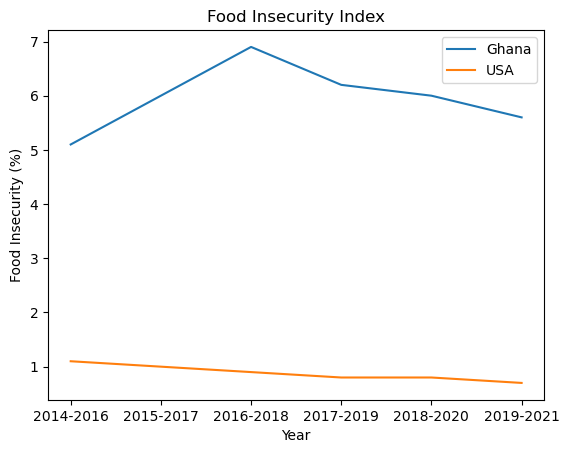

In [22]:
#Separate food insecurity data for usa and ghana for total population.

food_security_ghana_totalpop = food_security_ghana[food_security_ghana['Item Code']=='210401']                                            
food_security_usa_totalpop = food_security_usa[food_security_usa['Item Code']=='210401']


plt.plot(food_security_ghana_totalpop['Year'], food_security_ghana_totalpop['Value'], label="Ghana")
plt.plot(food_security_usa_totalpop['Year'], food_security_usa_totalpop['Value'], label="USA")
plt.legend(loc="best")
#plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Food Insecurity (%)")
plt.title("Food Insecurity Index")


In [23]:
#separate US data by state, sector, and gas type. sum the total gas emissions for each year
#US data frames to use: us_df_state, us_df_sector, us_df_gas, us_df_sum
us_df_state = us_df.groupby(['State']).sum()
us_df_state = us_df_state.style.format('{:.3f}')
us_df_sector = us_df.groupby(['Sector']).sum()
us_df_sector = us_df_sector.style.format('{:.3f}')
us_df_gas = us_df.groupby(['Gas']).sum()
us_df_sum = pd.DataFrame(us_df_gas.sum(axis=0)).T.rename(index={0:'US Total'}).style.format('{:.3f}')
us_df_gas = us_df_gas.style.format('{:.3f}')

#"all ghg" row needs to be filtered first for usa total

us_ghg=us_df[us_df['Gas']=='All GHG']

#filter agriculture sector for usa
us_ghg2=us_ghg[us_ghg['Sector'].str.contains('Agriculture')]

#total GHG emissions for Agriculture
us_ghg_total= us_ghg2[us_ghg2['State']=="USA"]

#Display all GHG by sector for USA

us_sectors= us_df[us_df['State']=='USA']
ghg_us_sectors= us_sectors[us_sectors['Gas']=='All GHG']
ghg_us_sectors

#Display all GHG by sector for Ghana
ghg_ghana_sectors= ghana_df[ghana_df['Gas']=='All GHG']
ghg_ghana_sectors



#create a stacked bar chart to display emissions by sector
#plt.bar(us_df_sector,ghg_ghana_sectors)


,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3637,GHA,Climate Watch,Total excluding LUCF,All GHG,11.897850,11.977650,12.507420,12.726720,13.064580,13.412390,14.334500,15.262370,17.979520,17.374090,17.631250,16.921140,18.176900,18.676760,17.519840,19.762230,20.942800,21.176910,20.980610,22.167380,23.954670,25.950330,28.536840,30.602020,30.140480,31.605390,32.092000,34.203900,35.832270,37.651570
3638,GHA,Climate Watch,Total including LUCF,All GHG,21.971620,22.051420,22.581200,22.800500,23.138350,23.488360,24.376610,25.689030,29.275680,28.046340,28.396830,62.795970,64.051290,64.551550,63.396000,65.644040,66.852940,67.086510,66.852260,68.018870,69.808790,55.376530,57.967230,60.019310,59.548890,61.022370,7.243964,9.304669,10.938470,12.747490
3639,GHA,Climate Watch,Energy,All GHG,3.555000,3.326100,3.768600,3.842400,4.136500,4.441800,4.779600,4.933600,6.817900,7.235200,6.031200,6.445700,7.637300,7.290200,6.816000,7.167200,8.621500,9.220800,8.813300,10.176600,11.277400,12.079800,14.159700,15.338300,14.889100,15.964800,16.081900,17.620200,19.255200,20.789100
3640,GHA,Climate Watch,Industrial Processes,All GHG,0.860362,0.894998,1.076034,1.152871,1.084807,1.004543,1.113719,1.287595,0.934672,1.059448,1.054224,1.042975,1.052025,1.040843,1.029761,0.978979,1.016787,1.051594,1.091502,1.136909,1.298017,1.533548,2.425480,2.507612,2.588744,2.417876,2.587520,2.613163,2.794807,2.898451
3641,GHA,Climate Watch,Agriculture,All GHG,6.750394,6.979730,6.872989,6.909441,6.936529,6.981573,7.429977,7.563491,8.672055,7.492860,8.717721,7.539638,7.413805,8.082969,7.212575,9.046131,8.644847,8.166854,8.260156,7.960230,8.407620,9.282713,8.814759,9.536574,9.360477,9.837925,9.951817,10.413810,10.139560,10.235350
3642,GHA,Climate Watch,Waste,All GHG,0.732090,0.776820,0.789800,0.822010,0.906740,0.984470,1.011200,1.477680,1.554890,1.586580,1.828100,1.892830,2.073770,2.262750,2.461500,2.569920,2.659670,2.737661,2.815652,2.893643,2.971633,3.054265,3.136897,3.219529,3.302161,3.384793,3.470761,3.556729,3.642697,3.728665
3643,GHA,Climate Watch,Land-Use Change and Forestry,All GHG,10.073770,10.073770,10.073770,10.073770,10.073770,10.075970,10.042120,10.426670,11.296160,10.672250,10.765580,45.874830,45.874390,45.874790,45.876170,45.881810,45.910140,45.909600,45.871650,45.851480,45.854120,29.426200,29.430390,29.417290,29.408410,29.416980,-24.848000,-24.899200,-24.893800,-24.904100
3644,GHA,Climate Watch,Bunker Fuels,All GHG,0.141300,0.105900,0.138000,0.118700,0.138000,0.179800,0.192700,0.192700,0.279500,0.467400,0.489900,0.370500,0.418900,0.415600,0.421600,0.518600,0.512100,0.554000,0.576900,0.644800,0.671200,0.699700,0.706100,0.592600,0.405200,0.385900,0.424200,0.821300,0.668000,0.888200
3649,GHA,Climate Watch,Electricity/Heat,All GHG,0.044300,0.052600,0.052600,0.060900,0.080800,0.065900,0.055800,0.031800,1.217300,1.150100,0.543400,0.934600,1.953800,1.732900,0.613500,1.100900,2.409800,2.611800,1.892800,1.731400,3.082900,2.525200,3.103500,3.692800,3.316200,3.371000,4.266900,4.637000,5.292200,5.957200
3650,GHA,Climate Watch,Building,All GHG,1.398000,1.290000,1.357000,1.396600,1.474900,1.555900,1.642600,1.695100,1.789900,1.828900,1.151000,1.238800,1.092600,1.224300,1.212000,1.120900,1.060900,1.233100,1.033500,1.459600,1.217800,1.377900,1.446600,1.360400,1.324100,1.411900,1.419800,1.538800,1.543800,1.606300


In [24]:
df_bar = ghg_ghana_sectors.drop(columns=['Country', 'Source', 'Gas'])
df_bar.head()

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3637,Total excluding LUCF,11.897850,11.977650,12.507420,12.726720,13.064580,13.412390,14.334500,15.262370,17.979520,17.374090,17.631250,16.921140,18.176900,18.676760,17.519840,19.762230,20.942800,21.176910,20.980610,22.167380,23.954670,25.950330,28.536840,30.602020,30.140480,31.605390,32.092000,34.203900,35.832270,37.651570
3638,Total including LUCF,21.971620,22.051420,22.581200,22.800500,23.138350,23.488360,24.376610,25.689030,29.275680,28.046340,28.396830,62.795970,64.051290,64.551550,63.396000,65.644040,66.852940,67.086510,66.852260,68.018870,69.808790,55.376530,57.967230,60.019310,59.548890,61.022370,7.243964,9.304669,10.938470,12.747490
3639,Energy,3.555000,3.326100,3.768600,3.842400,4.136500,4.441800,4.779600,4.933600,6.817900,7.235200,6.031200,6.445700,7.637300,7.290200,6.816000,7.167200,8.621500,9.220800,8.813300,10.176600,11.277400,12.079800,14.159700,15.338300,14.889100,15.964800,16.081900,17.620200,19.255200,20.789100
3640,Industrial Processes,0.860362,0.894998,1.076034,1.152871,1.084807,1.004543,1.113719,1.287595,0.934672,1.059448,1.054224,1.042975,1.052025,1.040843,1.029761,0.978979,1.016787,1.051594,1.091502,1.136909,1.298017,1.533548,2.425480,2.507612,2.588744,2.417876,2.587520,2.613163,2.794807,2.898451
3641,Agriculture,6.750394,6.979730,6.872989,6.909441,6.936529,6.981573,7.429977,7.563491,8.672055,7.492860,8.717721,7.539638,7.413805,8.082969,7.212575,9.046131,8.644847,8.166854,8.260156,7.960230,8.407620,9.282713,8.814759,9.536574,9.360477,9.837925,9.951817,10.413810,10.139560,10.235350


In [25]:
df_melted = df_bar.melt(id_vars= 'Sector', var_name= 'Year', value_name='Value')

df_melted.head()

,Sector,Year,Value
0,Total excluding LUCF,1990,11.897850
1,Total including LUCF,1990,21.971620
2,Energy,1990,3.555000
3,Industrial Processes,1990,0.860362
4,Agriculture,1990,6.750394


In [26]:
df_pivot = df_melted.pivot_table(index='Year', columns='Sector', values='Value')
df_pivot.head()

Sector,Agriculture,Building,Bunker Fuels,Electricity/Heat,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Manufacturing/Construction,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Transportation,Waste
Year,,,,,,,,,,,,,,
1990,6.750394,1.3980,0.1413,0.0443,3.5550,0.0014,0.860362,10.07377,0.3212,0.1258,11.89785,21.97162,1.6642,0.73209
1991,6.979730,1.2900,0.1059,0.0526,3.3261,0.0013,0.894998,10.07377,0.3182,0.1194,11.97765,22.05142,1.5445,0.77682
1992,6.872989,1.3570,0.1380,0.0526,3.7686,0.0014,1.076034,10.07377,0.3697,0.1452,12.50742,22.58120,1.8427,0.78980
1993,6.909441,1.3966,0.1187,0.0609,3.8424,0.0015,1.152871,10.07377,0.3794,0.1485,12.72672,22.80050,1.8556,0.82201
1994,6.936529,1.4749,0.1380,0.0808,4.1365,0.0404,1.084807,10.07377,0.4340,0.1743,13.06458,23.13835,1.9321,0.90674


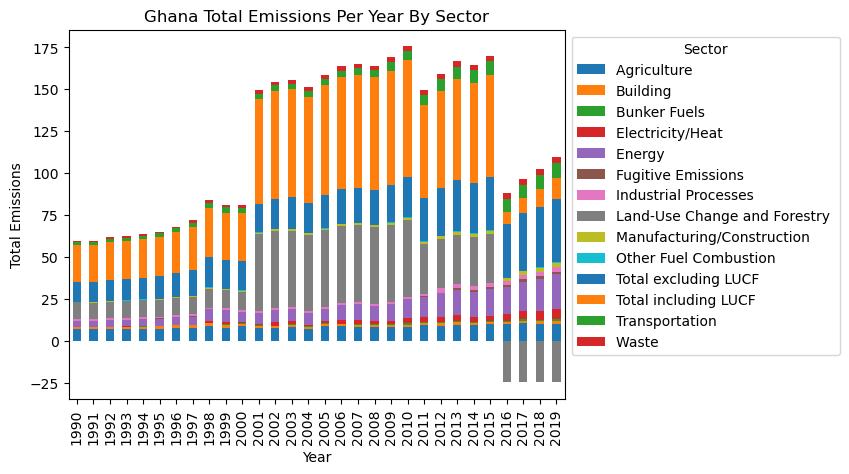

In [27]:
# create a stacked bar chart to display emissions by sector
df_pivot.plot.bar(stacked = True)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Ghana Total Emissions Per Year By Sector')
plt.legend(title = 'Sector',loc = 'upper left',bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.show()

In [30]:
df_bar_us = ghg_us_sectors.drop(columns=['State', 'Source', 'Gas'])
df_bar_us.head()
#ghg_us_sectors.head()

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2024,Agriculture,551.412016,544.102952,545.504036,572.541345,563.375531,573.315016,581.814439,573.238457,579.017261,573.601131,558.695130,581.076014,580.412335,581.676291,590.224708,579.822610,577.967836,596.463016,592.240072,592.896634,599.352844,582.248074,562.903305,606.359259,614.609853,618.503253,608.028331,608.203660,620.671987
2027,Bunker Fuels,0.000000,0.647944,0.544433,0.455090,0.436771,0.443541,0.441930,0.449460,0.504660,0.392032,0.355478,0.337184,0.228852,0.188767,0.275439,0.279268,0.473547,0.491512,0.507547,0.474182,0.503214,0.423882,0.370571,0.370571,0.370571,0.370571,0.370571,0.370571,0.370571
2029,Commercial,228.317454,229.142275,230.360374,228.073768,230.375464,233.517881,242.358194,242.557953,225.627047,227.712598,240.442527,231.284373,232.543977,243.148968,239.511196,228.725615,209.053070,218.551720,227.469334,224.936069,222.260134,223.264732,202.435503,224.445607,235.932688,242.075743,234.131128,235.845596,256.715915
2033,Electricity/Heat,1812.859827,1809.814728,1822.277075,1904.783730,1929.985797,1945.302294,2018.052889,2086.341339,2141.920474,2152.395421,2255.263222,2218.454849,2228.156709,2255.744190,2286.190727,2351.209672,2299.513032,2365.062931,2313.750921,2105.472655,2216.127570,2118.669794,1989.105024,2003.407354,2003.399015,1871.580837,1783.246410,1706.742410,1729.044461
2037,Energy,5364.987729,5321.355662,5421.813464,5519.206819,5602.404011,5669.253202,5867.898743,5958.419525,5935.481065,5982.454277,6151.006733,6041.030429,6076.146926,6122.955469,6233.341772,6254.129498,6172.590555,6260.044833,6078.442151,5673.376376,5862.249770,5747.070588,5534.398201,5677.015682,5727.718009,5581.586688,5483.740930,5449.197606,5600.657039


In [31]:
df_melted_us = df_bar_us.melt(id_vars= 'Sector', var_name= 'Year', value_name='Value')

df_melted_us.head()

,Sector,Year,Value
0,Agriculture,1990,551.412016
1,Bunker Fuels,1990,0.000000
2,Commercial,1990,228.317454
3,Electricity/Heat,1990,1812.859827
4,Energy,1990,5364.987729


In [32]:
df_pivot_us = df_melted_us.pivot_table(index='Year', columns='Sector', values='Value')
df_pivot_us.head()

Sector,Agriculture,Bunker Fuels,Commercial,Electricity/Heat,Energy,Fugitive Emissions,Industrial Processes,Industry,Land-Use Change and Forestry,Residential,Total excluding LUCF,Total including LUCF,Transportation,Waste
Year,,,,,,,,,,,,,,
1990,551.412016,0.000000,228.317454,1812.859827,5364.987729,202.142725,101.175628,1112.929372,-951.396392,347.828043,6202.280308,5250.883916,1660.910309,184.704934
1991,544.102952,0.647944,229.142275,1809.814728,5321.355662,200.022140,102.555301,1085.023945,-953.736951,354.892388,6157.290138,5204.201132,1642.460186,189.276223
1992,545.504036,0.544433,230.360374,1822.277075,5421.813464,200.152024,103.663097,1134.153370,-945.550136,365.030416,6263.928076,5318.922373,1669.840205,192.947479
1993,572.541345,0.455090,228.073768,1904.783730,5519.206819,193.747526,113.032132,1120.246557,-875.771529,380.619745,6400.662026,5525.345586,1691.735493,195.881730
1994,563.375531,0.436771,230.375464,1929.985797,5602.404011,196.241285,128.517339,1140.382776,-897.896889,371.433482,6489.397109,5591.936990,1733.985207,195.100228


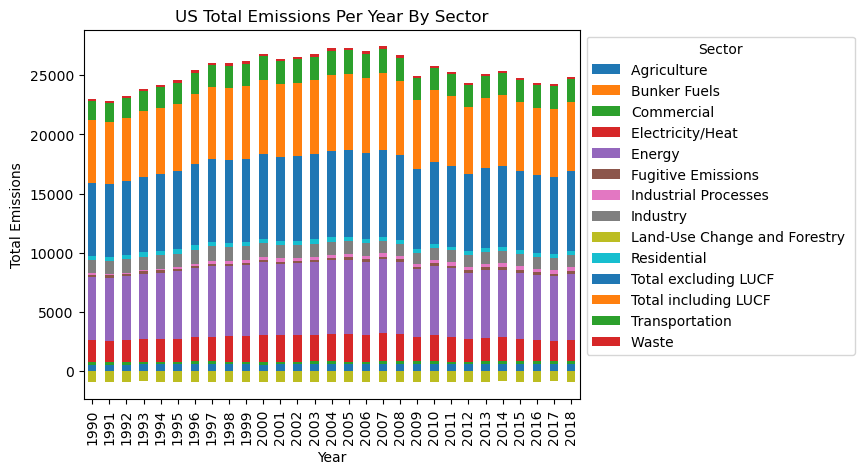

In [33]:
df_pivot_us.plot.bar(stacked = True)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('US Total Emissions Per Year By Sector')
plt.legend(title = 'Sector',loc = 'upper left',bbox_to_anchor=(1, 1))
#plt.tight_layout()
plt.show()

In [ ]:
#insert drought data and compare 

In [72]:
#separate Ghana data by sector and gas type. Sum the total gas emissions for each year
#Ghana data frames to use: ghana_df_sector, ghana_df_gas, ghana_df_sum
ghana_df_sector = ghana_df.groupby(['Sector']).sum()
ghana_df_sector = ghana_df_sector.style.format('{:.3f}')
ghana_df_gas = ghana_df.groupby(['Gas']).sum()
ghana_df_sum = pd.DataFrame(ghana_df_gas.sum(axis=0)).T.rename(index={0:'Ghana Total'}).style.format('{:.3f}')
ghana_df_gas = ghana_df_gas.style.format('{:.3f}')


#Filter Ghanas agriculture sector and all ghg emissions
gh_ghg=ghana_df[ghana_df['Sector'].str.contains('Agriculture')]

gh_ghg_total=gh_ghg[gh_ghg['Gas']=='All GHG']

#gh_ghg_total



Source,Climate Watch
1990,6.750394
1991,6.97973
1992,6.872989
1993,6.909441
1994,6.936529
1995,6.981573
1996,7.429977
1997,7.563491
1998,8.672055
1999,7.49286


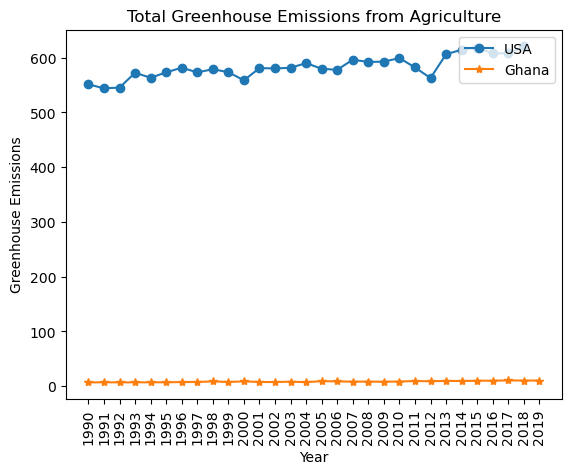

In [73]:
#compare ghanas and usa's total agriculture ghg emissions with a line graph 

usaghg= us_ghg_total.T
head_us=usaghg.iloc[1]
usaghg=usaghg[4:]
usaghg.columns=head_us

ghghg= gh_ghg_total.T
head_gh=ghghg.iloc[1]
ghghg=ghghg[4:]
ghghg.columns=head_gh


plt.plot(usaghg, label='USA', marker='o')
plt.plot(ghghg, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions")
plt.title("Total Greenhouse Emissions from Agriculture")



In [12]:
#clean land usage data by getting rid of unnecessary columns
land_usage_df = land_usage_df.drop(land_usage_df.columns[3:34], axis=1)
land_usage_df = land_usage_df.drop(columns=['Country Code','2020','2021','Unnamed: 66'])
land_usage_df.head(2)

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Agricultural land (% of land area),11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Africa Eastern and Southern,Agricultural land (% of land area),44.077433,44.175529,44.364624,43.405047,43.602308,43.786737,43.940969,44.096712,44.238249,44.453834,44.613694,44.754313,44.892132,45.218702,44.973395,45.150072,45.347753,45.511698,45.676483,45.943486,46.156943,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846


In [13]:
#separate out Ghana and USA land usage data
#Land Usage DataFrames to use: land_usage_gha_df, land_usage_usa_df
land_usage_gha_df = land_usage_df[land_usage_df['Country Name']=='Ghana']
land_usage_usa_df = land_usage_df[land_usage_df['Country Name']=='United States']
land_usage_gha_df

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83,Ghana,Agricultural land (% of land area),55.396853,55.902259,55.902259,56.253845,56.693329,57.572295,58.451261,59.892766,58.392634,58.190318,57.548519,57.447297,57.297732,56.783396,56.000976,56.383185,55.886429,55.829155,55.332399,55.714608,56.008922,55.608544,55.735545,55.774651,55.813756,55.852861,55.653336,55.45381,55.406258,55.391316


Text(0.5, 1.0, '% of Land Area used for Agriculture')

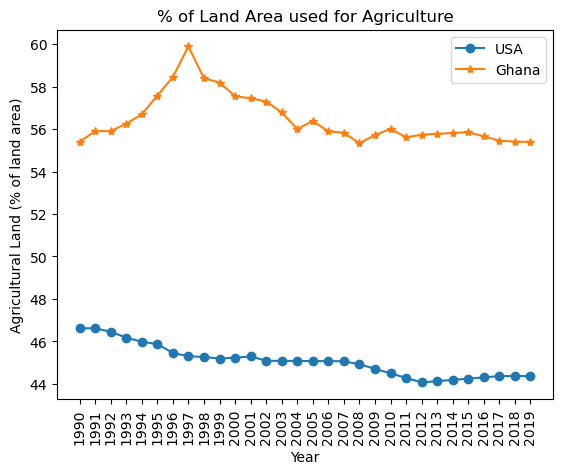

In [14]:
#create a line graph visualizing land use 

usaland_transposed= land_usage_usa_df.T
head=usaland_transposed.iloc[1]
usaland_transposed=usaland_transposed[2:]
usaland_transposed.columns=head

usaland_transposed

ghland_transposed=land_usage_gha_df.T
head2=ghland_transposed.iloc[1]
ghland_transposed=ghland_transposed[2:]
ghland_transposed.columns=head

plt.plot(usaland_transposed, label='USA', marker='o')
plt.plot(ghland_transposed, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Agricultural Land (% of land area)")
plt.title("% of Land Area used for Agriculture")

